In [1]:
import pandas as pd  

# Load dataset
df = pd.read_csv("customer_support_tickets.csv")

# Display first few rows
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop columns that are not useful for prediction (e.g., Customer Name, Email)
df.drop(['Customer Name', 'Customer Email'], axis=1, inplace=True)

# Convert date columns to datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Fill missing values in 'Resolution' with 'No Resolution'
df['Resolution'].fillna('No Resolution', inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Check updated dataset
df.head()


Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,32,2,16,2021-03-22,4,13,3369,2,1518,0,3,2023-06-01 12:15:36,NaT,NaN
1,2,42,0,21,2021-05-22,4,10,2004,2,1518,0,0,2023-06-01 16:45:38,NaT,NaN
2,3,48,2,10,2020-07-14,4,8,189,0,343,2,3,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,27,0,25,2020-11-13,0,0,1971,0,2550,2,3,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,67,0,5,2020-02-04,0,3,636,0,2658,2,1,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


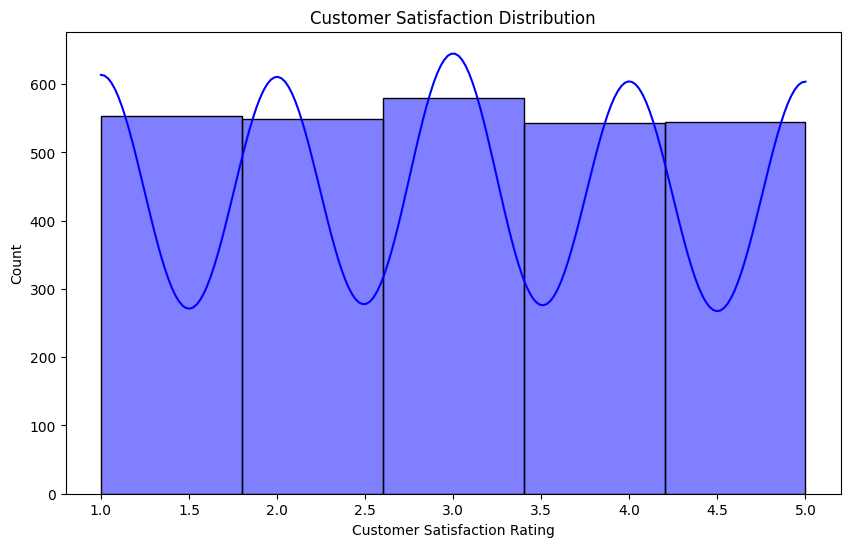

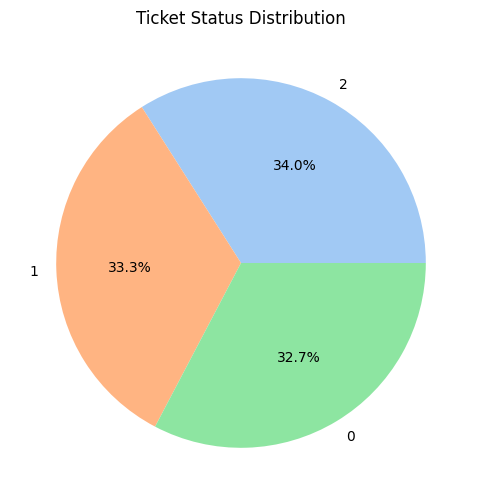

In [3]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Customer Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Satisfaction Rating'].dropna(), bins=5, kde=True, color='blue')
plt.title("Customer Satisfaction Distribution")
plt.show()

# Ticket Status Distribution
plt.figure(figsize=(8, 6))
df['Ticket Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Ticket Status Distribution")
plt.ylabel("")
plt.show()


In [7]:
# Define features and target
X = df.drop(['Customer Satisfaction Rating'], axis=1)  # Features
y = df['Customer Satisfaction Rating']  # Target variable

# Drop or convert datetime columns (choose one method)
X = X.drop(columns=['Date of Purchase', 'First Response Time', 'Time to Resolution'], errors='ignore')

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Drop rows where y (target) is NaN
X = X[y.notnull()]
y = y.dropna()

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.2009626955475331
              precision    recall  f1-score   support

         1.0       0.18      0.16      0.17       168
         2.0       0.23      0.24      0.24       174
         3.0       0.24      0.24      0.24       175
         4.0       0.18      0.17      0.18       162
         5.0       0.17      0.19      0.18       152

    accuracy                           0.20       831
   macro avg       0.20      0.20      0.20       831
weighted avg       0.20      0.20      0.20       831



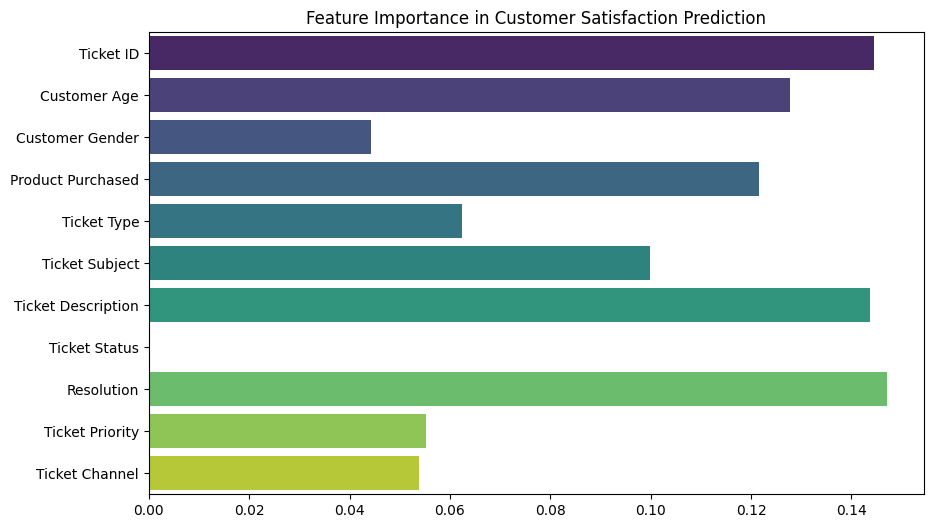

In [9]:
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance in Customer Satisfaction Prediction")
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Predict and evaluate again
y_pred_best = best_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Optimized Accuracy: 0.20938628158844766


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

# Apply cleaning function
df['Ticket Description'] = df['Ticket Description'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grees\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(df['Ticket Description'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Merge TF-IDF features with original dataset
df = pd.concat([df, tfidf_df], axis=1).drop(['Ticket Description'], axis=1)


In [19]:
# Convert to datetime format
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Handle missing values
df['Time to Resolution'].fillna(df['First Response Time'], inplace=True)

# Convert time difference into seconds
df['Time to Resolution (Seconds)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds()

# Fill remaining NaN values with the median
df['Time to Resolution (Seconds)'].fillna(df['Time to Resolution (Seconds)'].median(), inplace=True)

# Drop the original datetime columns (optional)
df.drop(columns=['First Response Time', 'Time to Resolution'], inplace=True)

# Now "Time to Resolution (Seconds)" is a numeric column and can be used for regression.


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Drop or fill missing values
X_reg = X_reg.dropna()
y_reg = y_reg.loc[X_reg.index]

# Split dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))


Mean Absolute Error: 11513087.474808596
Mean Squared Error: 5.432788503440841e+16


C:\Users\grees\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grees\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


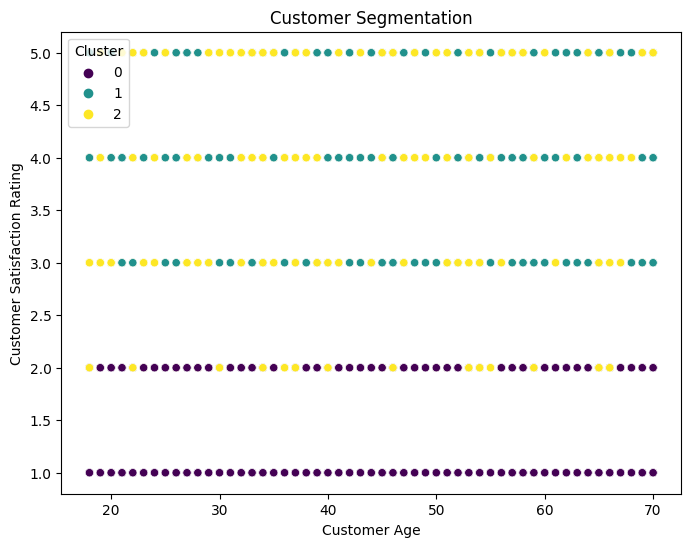

In [21]:
from sklearn.cluster import KMeans

features = ['Customer Age', 'Customer Satisfaction Rating', 'Ticket Priority']
df_clustering = df[features].dropna()

# Normalize data
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clustering['Customer Age'], y=df_clustering['Customer Satisfaction Rating'], hue=df_clustering['Cluster'], palette="viridis")
plt.title("Customer Segmentation")
plt.show()


In [22]:
import joblib

# Save the trained model
joblib.dump(best_model, "customer_satisfaction_model.pkl")

# Save the scaler for future data normalization
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']